# Applying Principal Component Analysis

## Import the libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

Load the data

In [13]:
iris_df = pd.read_csv('Iris.csv', index_col=0)
iris_df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
149,6.2,3.4,5.4,2.3,Iris-virginica
45,5.1,3.8,1.9,0.4,Iris-setosa
90,5.5,2.5,4.0,1.3,Iris-versicolor
119,7.7,2.6,6.9,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica
71,5.9,3.2,4.8,1.8,Iris-versicolor
65,5.6,2.9,3.6,1.3,Iris-versicolor
16,5.7,4.4,1.5,0.4,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa


Create a plot of the data using all features to show the positive and negative correlations between them.

Correlation Matrix:
                SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


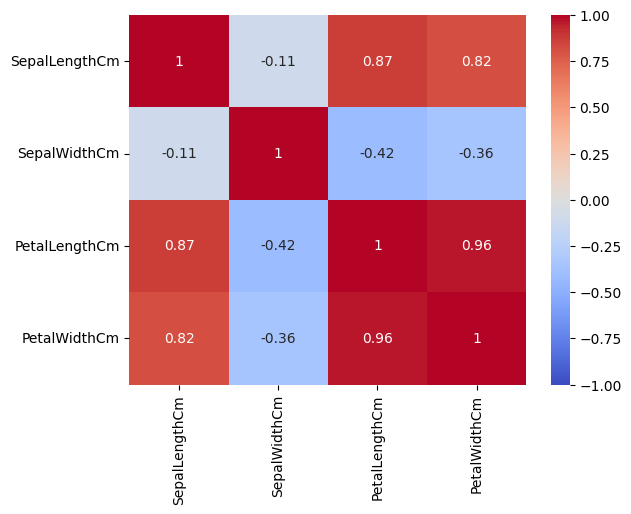

In [14]:
no_species_df = iris_df.drop('Species', axis=1)

# Calculate correlation coefficients (considering only numerical columns)
correlation = no_species_df.corr()

# Print correlation matrix
print("Correlation Matrix:\n", correlation)

# Create a heatmap using seaborn
sns.heatmap(correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)  # Adjust parameters as needed
plt.show()

Scale the data, then apply PCA to it. Use n_components = 3.

In [15]:
# Scale the data (centering and scaling features)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(no_species_df)

# Apply PCA with n_components=3 (reducing to 3 principal components)
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

# Print the explained variance ratio (importance of each principal component)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.72770452 0.23030523 0.03683832]


The explained variance ratio of 0.7277 for PC1 and 0.2303 for PC2 (total: 0.958), indicates that:
* PC1 captures 72.77% of the data's variation, which is a significant portion.
* PC2 adds another 23.03%, bringing the total explained variance to almost 96%.
* PC3 only explains a small additional 3.68%.

This suggests that using only PC1 and PC2 might be sufficient for our analysis if we can tolerate a slight loss of information (around 4.2%).

Plot the transformed version of the data

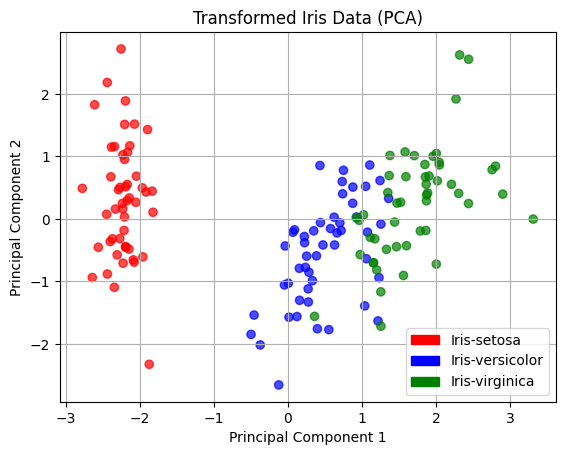

In [28]:
# Apply PCA with n_components=2 (reduce to 2 principal components)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Extract the first two principal components
pc1 = pca_data[:, 0]
pc2 = pca_data[:, 1]

# Label the points according to the original species (for reference)
species = iris_df['Species']

species_colours = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

# Define a list to store legend handles, which are visual representations of the data categories.
legend_handles = []
for species_name, colour in species_colours.items():
  legend_handles.append(Patch(color=colour, label=species_name))
  
# Create a list of corresponding labels for each legend handle.
legend_labels = list(species_colours.keys())


# Plot the transformed data (PC1 vs PC2)
plt.scatter(pc1, pc2, c=[species_colours[s] for s in species], alpha=0.7, label=species)  # Adjust parameters as needed
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Transformed Iris Data (PCA)')
plt.legend(legend_handles, legend_labels)
plt.grid(True)
plt.show()


Compare the two plots and comment on what redundancy is likely to have been removed from the data.

As explained previously,  the distribution of explained variance suggests that the first two principal components capture a significant portion (almost 96%) of the total variation in the data. This supports the notion that PCA effectively reduced dimensionality while preserving most of the relevant information.

The high explained variance captured by PC1 (72.77%) strengthens the argument that PCA removed redundancy related to the strong correlations observed between Sepal Length, Petal Length, and Petal Width in the correlation matrix. These features likely contribute significantly to PC1, explaining the overlap of Iris-versicolor and Iris-virginica in the PCA scatter plot.

From the correlation matrix, we see strong positive correlations between Sepal Length (SL), Petal Length (PL) and Petal Width (PW) and the weak negative correlations between Sepal Width (SW) with other features.

Based on the correlation matrix and the overlap observed in the scatter plot, PCA might have captured the shared variations in Sepal Length, Petal Length, and Petal Width into one or two principal components. This could be considered redundancy, as these features contain overlapping information.

The weaker correlation of Sepal Width might have contributed less to the main captured variations, potentially remaining partially distinct for Iris-setosa.